In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../../base_df.csv")

In [183]:
# Stats
# Count projects
print("Number of projects:", len(df[["project name"]].drop_duplicates()))
# List of projects
print("Project names:\n", "\n".join([i[0] for i in df[["project name"]].drop_duplicates().values]), sep="")
# Count unique commits
print("Number of unique commits:", len(df[["project name", "commit hash"]].drop_duplicates()))
# Count cache tuples
print("Number of unique cache tuples:", len(df[["project name", "commit hash", "coq version"]].drop_duplicates()))
# Count executed proofs
df1 = df[["project name", "commit hash", "coq version", "filename", "command index", "proof index"]]
df1_proofs_only = df1[df1["proof index"] != 0]
print("Number of executed proofs:", len(df1_proofs_only.drop_duplicates()))
# Count successfully executed sentences
print("Number of successfully executed sentences:", len(df))
# Count compiled files
df3 = df[["project name", "commit hash", "coq version", "filename"]]
print("Number of compiled files:", len(df3.drop_duplicates()))
# Get max open goals and histogram of open goals
df["total goal count"] = df["foreground goal count"] + df["background goal count"] + df["abandoned goal count"] + df["shelved goal count"]
print("Maximum total open goal count:", df["total goal count"].max())
# DF with proof sentences only
df["total hypothesis count"] = df["foreground hypothesis count"] + df["background hypothesis count"] + df["abandoned hypothesis count"] + df["shelved hypothesis count"]

Number of projects: 9
Project names:
hoare-tut
coqoban
pocklington
coq-simple-io
coq-http
dblib
bigenough
sudoku
huffman
Number of unique commits: 191
Number of unique cache tuples: 514
Number of executed proofs: 59628
Number of successfully executed sentences: 849663
Number of compiled files: 5556
Maximum total open goal count: 17


Text(0.5, 0, 'Number of hypotheses')

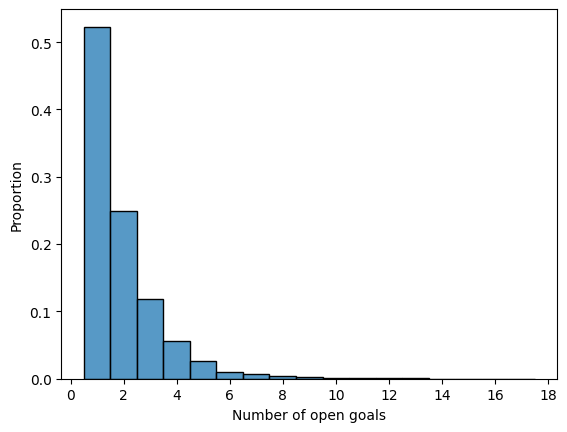

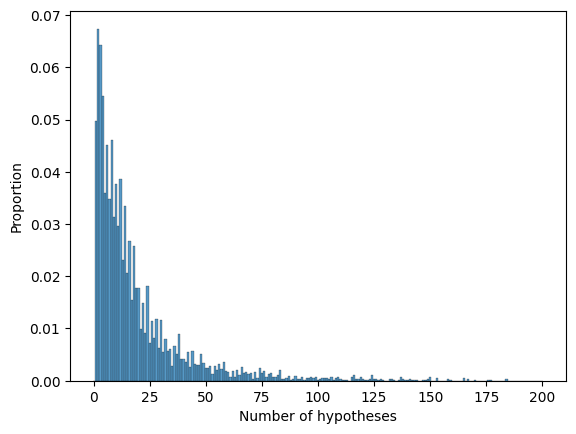

In [184]:
# Histogram
df_proofs_only = df[df["proof index"] != 0]
fig = plt.figure()
sns.histplot(data=df_proofs_only[df_proofs_only["total goal count"] > 0], x="total goal count", stat="proportion", discrete=True)
ax = fig.axes[0]
ax.set_xticks(range(0, 20, 2))
ax.set_xlabel("Number of open goals")
# ax.set_ylabel("Proportion of occurrences")
# Get histogram of open hypotheses
fig = plt.figure()
sns.histplot(data=df_proofs_only[df_proofs_only["total hypothesis count"] > 0], x="total hypothesis count", stat="proportion", discrete=True, binrange=[0, 200])
ax = fig.axes[0]
# ax.set_xticks(range(0, 201, 25))
# ax.set_xlim(-25, 225)
ax.set_xlabel("Number of hypotheses")
# ax.set_ylabel("Number of occurrences")

In [185]:
print("Sentence counts. The count column here also shows the number of cache tuples per project.")
df.value_counts(subset=["project name", "commit hash"]).groupby("project name").describe()
# The below histgorams look like crap. Not enough unique bins. Better to use the table above
# project_names = list(df["project name"].unique())
# for project_name in project_names:
#     plt.figure()
#     df[df["project name"] == project_name].value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").hist()
# TODO: Box and whisker plot, maybe

Sentence counts. The count column here also shows the number of cache tuples per project.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,3.0,258.000000,0.000000,258.0,258.0,258.0,258.0,258.0
coq-http,1.0,175.000000,NaN,175.0,175.0,175.0,175.0,175.0
coq-simple-io,55.0,1092.218182,375.472773,64.0,866.0,1148.0,1370.0,1568.0
coqoban,3.0,2275.000000,0.000000,2275.0,2275.0,2275.0,2275.0,2275.0
dblib,25.0,5368.480000,2138.842037,1639.0,6516.0,6552.0,6552.0,6560.0
hoare-tut,7.0,1044.428571,5.028490,1038.0,1041.0,1044.0,1048.5,1050.0
huffman,79.0,4185.088608,91.592491,3946.0,4189.0,4189.0,4245.0,4262.0
pocklington,4.0,26184.000000,22676.009173,6546.0,6546.0,26184.0,45822.0,45822.0
sudoku,14.0,14638.285714,44.284793,14616.0,14616.0,14616.0,14616.0,14720.0


In [186]:
print("Ignore: Box and whisker plots for sentence counts over commits and coq versions")
# boxplot_series = df.value_counts(subset=["project name", "commit hash"])
# boxplot_crosstab = pd.crosstab(df["commit hash"], df["project name"])
# print(boxplot_crosstab.melt())
# sns.boxplot(data=boxplot_crosstab.melt(), x="project name", y="value", showfliers=False)
# plt.xticks(rotation=45)
# plt.ylabel("Sentence count")

Ignore: Box and whisker plots for sentence counts over commits and coq versions


In [187]:
print("Proof counts. Projects coq-http and coq-simple-io don't have any proofs in the successfully extracted commits.")
df.loc[df["proof index"] > 0].loc[df["proof step index"] == 0].value_counts(subset=["project name", "commit hash", "coq version"]).groupby("project name").describe()

Proof counts. Projects coq-http and coq-simple-io don't have any proofs in the successfully extracted commits.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,18.0,5.00000,0.000000,5.0,5.0,5.0,5.0,5.0
coqoban,15.0,3.00000,0.000000,3.0,3.0,3.0,3.0,3.0
dblib,82.0,193.00000,0.000000,193.0,193.0,193.0,193.0,193.0
hoare-tut,21.0,25.00000,0.000000,25.0,25.0,25.0,25.0,25.0
huffman,79.0,315.21519,1.411227,311.0,314.0,316.0,316.0,318.0
pocklington,16.0,265.00000,0.000000,265.0,265.0,265.0,265.0,265.0
sudoku,56.0,250.00000,0.000000,250.0,250.0,250.0,250.0,250.0


In [188]:
print("Files per project.")
df[["project name", "commit hash", "filename"]].drop_duplicates().value_counts(subset=["project name", "commit hash"]).groupby("project name").describe()

Files per project.


,count,mean,std,min,25%,50%,75%,max
project name,,,,,,,,
bigenough,3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
coq-http,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
coq-simple-io,55.0,8.654545,3.830763,1.0,7.5,8.0,12.5,14.0
coqoban,3.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
dblib,25.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0
hoare-tut,7.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
huffman,79.0,25.594937,0.494041,25.0,25.0,26.0,26.0,26.0
pocklington,4.0,14.000000,0.000000,14.0,14.0,14.0,14.0,14.0
sudoku,14.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


Command type occurrences.
command type
VernacSolve                      531786
VernacEndProof                    59613
VernacStartTheoremProof           52488
VernacProof                       51941
VernacAssumption                  29340
VernacDefinition                  19866
VernacRequire                     18308
ExtractionConstant                12588
VernacHints                       10035
VernacBullet                       8620
ExtractionInlinedConstant          8248
VernacInstance                     6418
VernacFixpoint                     5418
VernacArguments                    5272
VernacInductive                    5246
VernacDeclareTacticDefinition      4810
VernacEndSegment                   4066
VernacBeginSection                 2899
VernacSetOption                    1271
VernacNotation                     1267
VernacDefineModule                 1230
VernacInfix                        1064
VernacEndSubproof                   976
VernacSubproof                      976
V

Text(0, 0.5, 'Sentence Type')

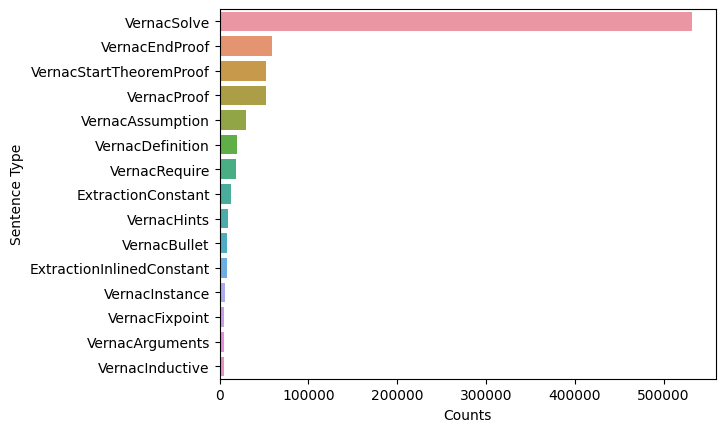

In [189]:
print("Command type occurrences.")
barplot_series = df.value_counts(subset="command type")
print(barplot_series)
series_largest = barplot_series.nlargest(15)
sns.barplot(y=series_largest.index, x=series_largest.values)
plt.xlabel("Counts")
plt.ylabel("Sentence Type")

In [190]:
print("Ignore: Command type occurrences grouped by project")
# If we really want to show all this, save it as a CSV file. The output of describe() is itself a dataframe.
# df.value_counts(subset=["project name", "commit hash", "coq version", "command type"]).groupby(["project name", "command type"]).describe()

Ignore: Command type occurrences grouped by project


Command type occurrences, proof sentences only
command type
VernacSolve                      531786
VernacEndProof                    59613
VernacProof                       51941
VernacBullet                       8620
VernacEndSubproof                   976
VernacSubproof                      976
Obligations                         592
VernacDeclareTacticDefinition        82
VernacAbort                          15
dtype: int64


Text(0, 0.5, 'Sentence Type')

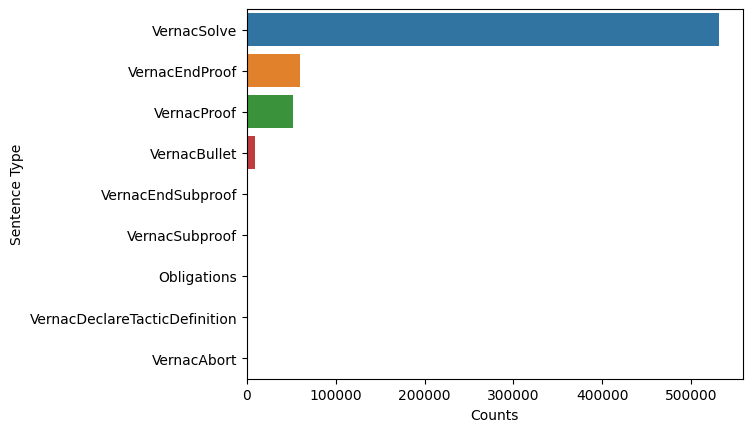

In [191]:
print("Command type occurrences, proof sentences only")
barplot_series = df_proofs_only.value_counts(subset="command type")
print(barplot_series)
sns.barplot(y=barplot_series.index, x=barplot_series.values)
plt.xlabel("Counts")
plt.ylabel("Sentence Type")

In [192]:
print("Command type occurrences, proof sentences only, group by project.")
df_proofs_only.value_counts(subset=["project name", "commit hash", "coq version", "command type"]).groupby(["project name", "command type"]).describe()

Command type occurrences, proof sentences only, group by project.


count         mean        std  \
project name command type                                                   
bigenough    VernacEndProof                  18.0     5.000000   0.000000   
             VernacProof                     18.0     5.000000   0.000000   
             VernacSolve                     18.0     5.000000   0.000000   
coqoban      VernacAbort                     15.0     1.000000   0.000000   
             VernacEndProof                  15.0     2.000000   0.000000   
             VernacSolve                     15.0    48.000000   0.000000   
dblib        VernacBullet                    82.0    56.000000   0.000000   
             VernacDeclareTacticDefinition   82.0     1.000000   0.000000   
             VernacEndProof                  82.0   193.000000   0.000000   
             VernacEndSubproof               82.0    10.000000   0.000000   
             VernacProof                     82.0   193.000000   0.000000   
             VernacSolve                     82.0   759.097561   0.433469   
             VernacSubproof                  82.0    10.000000   0.000000   
hoare-tut    VernacEndProof                  21.0    25.000000   0.000000   
             VernacProof                     21.0    25.000000   0.000000   
             VernacSolve                     21.0   150.142857   1.388730   
huffman      Obligations                     44.0    13.454545   2.039774   
             VernacBullet                    41.0     4.000000   0.000000   
             VernacEndProof                  79.0   315.215190   1.411227   
             VernacProof                     70.0   303.600000   6.470446   
             VernacSolve                     79.0  2856.924051  22.151444   
pocklington  VernacEndProof                  16.0   265.000000   0.000000   
             VernacProof                     16.0   264.000000   0.000000   
             VernacSolve                     16.0  5602.000000   0.000000   
sudoku       VernacBullet                    56.0    69.000000  11.593101   
             VernacEndProof                  56.0   250.000000   0.000000   
             VernacEndSubproof               56.0     2.785714   0.414039   
             VernacProof                     56.0   179.000000   0.000000   
             VernacSolve                     56.0  2683.000000   0.000000   
             VernacSubproof                  56.0     2.785714   0.414039   

                                               min     25%     50%     75%  \
project name command type                                                    
bigenough    VernacEndProof                    5.0     5.0     5.0     5.0   
             VernacProof                       5.0     5.0     5.0     5.0   
             VernacSolve                       5.0     5.0     5.0     5.0   
coqoban      VernacAbort                       1.0     1.0     1.0     1.0   
             VernacEndProof                    2.0     2.0     2.0     2.0   
             VernacSolve                      48.0    48.0    48.0    48.0   
dblib        VernacBullet                     56.0    56.0    56.0    56.0   
             VernacDeclareTacticDefinition     1.0     1.0     1.0     1.0   
             VernacEndProof                  193.0   193.0   193.0   193.0   
             VernacEndSubproof                10.0    10.0    10.0    10.0   
             VernacProof                     193.0   193.0   193.0   193.0   
             VernacSolve                     758.0   759.0   759.0   759.0   
             VernacSubproof                   10.0    10.0    10.0    10.0   
hoare-tut    VernacEndProof                   25.0    25.0    25.0    25.0   
             VernacProof                      25.0    25.0    25.0    25.0   
             VernacSolve                     148.0   148.0   151.0   151.0   
huffman      Obligations                       6.0    14.0    14.0    14.0   
             VernacBullet                      4.0     4.0     4.0     4.0   
             Vernac

Command type occurrences, non-proof sentences only
command type
VernacStartTheoremProof          52488
VernacAssumption                 29340
VernacDefinition                 19866
VernacRequire                    18308
ExtractionConstant               12588
VernacHints                      10035
ExtractionInlinedConstant         8248
VernacInstance                    6418
VernacFixpoint                    5418
VernacArguments                   5272
VernacInductive                   5246
VernacDeclareTacticDefinition     4728
VernacEndSegment                  4066
VernacBeginSection                2899
VernacSetOption                   1271
VernacNotation                    1267
VernacDefineModule                1230
VernacInfix                       1064
VernacCheckMayEval                 952
ExtractionBlacklist                648
VernacImport                       557
VernacSyntacticDefinition          502
VernacSetOpacity                   489
VernacDelimiters                   376


Text(0, 0.5, 'Sentence Type')

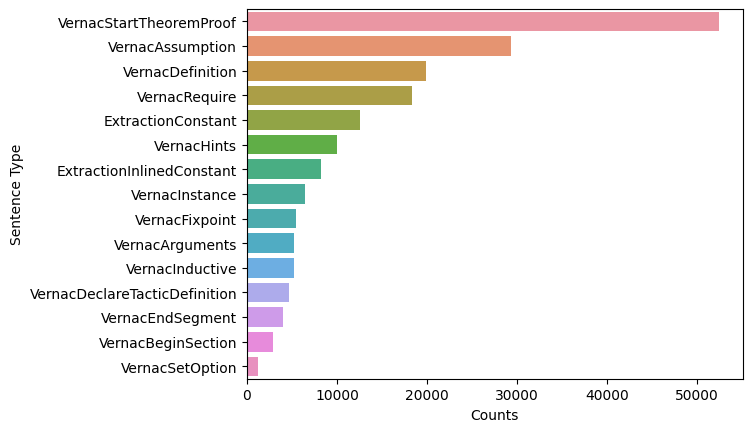

In [193]:
print("Command type occurrences, non-proof sentences only")
barplot_series = df[df["proof index"] == 0].value_counts(subset="command type")
print(barplot_series)
series_largest = barplot_series.nlargest(15)
sns.barplot(y=series_largest.index, x=series_largest.values)
plt.xlabel("Counts")
plt.ylabel("Sentence Type")

In [194]:
# Goal Histogram bonanza
# project_names = list(df["project name"].unique())
# for project_name in project_names:
#     fig = plt.figure()
#     sns.histplot(data=df_proofs_only[df_proofs_only["total goal count"] > 0].loc[df_proofs_only["project name"] == project_name], x="total goal count", stat="proportion", discrete=True)
#     ax = fig.axes[0]
#     ax.set_xticks(range(0, 20, 2))
#     ax.set_xlabel("Number of open goals")
#     ax.set_title(project_name)

In [195]:
# Hypothesis Histogram bonanza
# project_names = list(df["project name"].unique())
# for project_name in project_names:
#     fig = plt.figure()
#     sns.histplot(data=df_proofs_only[df_proofs_only["total hypothesis count"] > 0].loc[df_proofs_only["project name"] == project_name], x="total hypothesis count", stat="proportion", discrete=True, binrange=[0, 200])
#     ax = fig.axes[0]
#     ax.set_xlabel("Number of open hypotheses")
#     ax.set_title(project_name)

In [196]:
print("Sum over maximum unique proofs per project")
per_project_max_unique_proofs = df_proofs_only[["project name", "commit hash", "coq version", "command index", "proof index"]].drop_duplicates().value_counts(subset=["project name", "commit hash", "coq version"])
# print(per_project_max_unique_proofs)
print(per_project_max_unique_proofs.groupby("project name").max().sum())

Sum over maximum unique proofs per project
413
